In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Load Dataset

In [30]:
columns_name = ['Pregnancie','Glucose','BloodPress','Skin Thickn','Insulin','BMi','Diabetes','Age','Outcomes']
df_train = pd.read_csv('Diabetes.csv',names = columns_name)
df_train.head()

,Pregnancie,Glucose,BloodPress,Skin Thickn,Insulin,BMi,Diabetes,Age,Outcomes
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [31]:
columns_name = ['Pregnancie','Glucose','BloodPress','Skin Thickn','Insulin','BMi','Diabetes','Age','Outcomes']
df_test = pd.read_csv('Diabetes.csv',names = columns_name)
df_test.head()

,Pregnancie,Glucose,BloodPress,Skin Thickn,Insulin,BMi,Diabetes,Age,Outcomes
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


Split the Dataset

In [32]:
X_train = df_train.loc[:,df_train.columns != 'Outcomes']
y_train = df_train.Outcomes
print(y_train.head())
label_en = LabelEncoder()
y_train = label_en.fit_transform(y_train)




0    Outcome
1          1
2          0
3          1
4          0
Name: Outcomes, dtype: object


In [33]:
X_test = df_train.iloc[:,:-1]
y_test = df_train.iloc[:,-1]
print(y_test.head())
label_en = LabelEncoder()
y_test = label_en.fit_transform(y_test)

0    Outcome
1          1
2          0
3          1
4          0
Name: Outcomes, dtype: object


In [34]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

Accuracy 0.6501950585175552


C:\Users\1040 G3\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

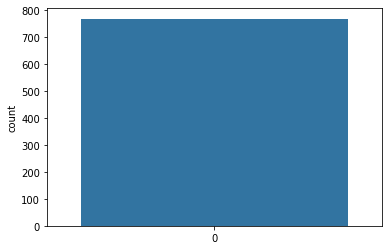

In [35]:
clf = RandomForestClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_test_encoded)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

sns.countplot(y_pred,data=df_test)